# High Velocity Spikes In Gowdy Spacetimes by Garfinkle and Weaver
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 20, 2022

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,x,y,z,dt,dx,dy,dz = symbols('t x y z dt dx dy dz')

In [4]:
P = Function('P')(t,x)
P

In [5]:
Q = Function('Q')(t,x)
Q

In [6]:
Lambda = Function('lambda')(t,x)
Lambda

In [7]:
variables = Matrix([t,x,y,z])
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix([dt,dx,dy,dz])
differentials 

⎡dt⎤
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎢dy⎥
⎢  ⎥
⎣dz⎦

In [9]:
lineElement = expand(exp(Lambda/2)* sqrt(t)**(-1) * (-dt**2 + dx**2) + t * ( exp(P) * (dy + Q * dz)**2 + exp(-P) * dz**2 ) ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  λ(t, x)                                                                  ⎤
⎢  ───────                                                                  ⎥
⎢     2                                                                     ⎥
⎢-ℯ                                                                         ⎥
⎢──────────     0              0                           0                ⎥
⎢    √t                                                                     ⎥
⎢                                                                           ⎥
⎢             λ(t, x)                                                       ⎥
⎢             ───────                                                       ⎥
⎢                2                                                          ⎥
⎢            ℯ                                                              ⎥
⎢    0       ────────          0                           0                ⎥
⎢               √t                                              

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡  λ(t, x)                                                                  ⎤
⎢  ───────                                                                  ⎥
⎢     2                                                                     ⎥
⎢-ℯ                                                                         ⎥
⎢──────────     0              0                           0                ⎥
⎢    √t                                                                     ⎥
⎢                                                                           ⎥
⎢             λ(t, x)                                                       ⎥
⎢             ───────                                                       ⎥
⎢                2                                                          ⎥
⎢            ℯ                                                              ⎥
⎢    0       ────────          0                           0                ⎥
⎢               √t                                              

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t x y z")
t,x,y,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡  ∂                   ∂                                                                   
⎢⎢t⋅──(λ(t, x)) - 1     ──(λ(t, x))                                                         
⎢⎢  ∂t                  ∂x                                                                  
⎢⎢─────────────────     ───────────                                        0                
⎢⎢       4⋅t                 4                                                              
⎢⎢                                                                                          
⎢⎢   ∂                 ∂                                                                    
⎢⎢   ──(λ(t, x))     t⋅──(λ(t, x)) - 1                                                      
⎢⎢   ∂x                ∂t                                                                   
⎢⎢   ───────────     ─────────────────                                     0                
⎢⎢        4                 4⋅t                                       

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛                            2                  2     2              2         ⎞         
⎢  ⎜     2⋅P(t, x) ⎛∂          ⎞      ⎛∂          ⎞     ∂              ∂          ⎟   ∂     
⎢t⋅⎜- 2⋅ℯ         ⋅⎜──(Q(t, x))⎟  - 2⋅⎜──(P(t, x))⎟  - ───(λ(t, x)) + ───(λ(t, x))⎟ + ──(λ(t
⎢  ⎜               ⎝∂t         ⎠      ⎝∂t         ⎠      2              2         ⎟   ∂t    
⎢  ⎝                                                   ∂t             ∂x          ⎠         
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                              4⋅t                                          
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢             2⋅P(t, x) ∂           ∂             ∂           ∂       

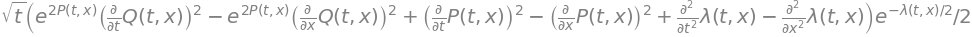

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                             2                                2                     2      
⎢      2⋅P(t, x) ⎛∂          ⎞          2⋅P(t, x) ⎛∂          ⎞         ⎛∂          ⎞       
⎢0.25⋅ℯ         ⋅⎜──(Q(t, x))⎟  - 0.25⋅ℯ         ⋅⎜──(Q(t, x))⎟  + 0.25⋅⎜──(P(t, x))⎟  - 0.2
⎢                ⎝∂t         ⎠                    ⎝∂x         ⎠         ⎝∂t         ⎠       
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [22]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡    ⎛                          2                  2     2              2         ⎞         
⎢    ⎜   2⋅P(t, x) ⎛∂          ⎞      ⎛∂          ⎞     ∂              ∂          ⎟   ∂     
⎢- t⋅⎜2⋅ℯ         ⋅⎜──(Q(t, x))⎟  + 2⋅⎜──(P(t, x))⎟  + ───(λ(t, x)) - ───(λ(t, x))⎟ + ──(λ(t
⎢    ⎜             ⎝∂t         ⎠      ⎝∂t         ⎠      2              2         ⎟   ∂t    
⎢    ⎝                                                 ∂t             ∂x          ⎠         
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                              4⋅t                                          
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢             ⎛ 2⋅P(t, x) ∂           ∂             ∂           ∂     

In [23]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                           
⎢                               2                                2                     2    
⎢        2⋅P(t, x) ⎛∂          ⎞          2⋅P(t, x) ⎛∂          ⎞         ⎛∂          ⎞     
⎢- 0.25⋅ℯ         ⋅⎜──(Q(t, x))⎟  - 0.25⋅ℯ         ⋅⎜──(Q(t, x))⎟  - 0.25⋅⎜──(P(t, x))⎟  - 0
⎢                  ⎝∂t         ⎠                    ⎝∂x         ⎠         ⎝∂t         ⎠     
⎢                                                                                           
⎢                             ⎛ 2⋅P(t, x) ∂           ∂             ∂           ∂          ⎞
⎢                       - 2⋅t⋅⎜ℯ         ⋅──(Q(t, x))⋅──(Q(t, x)) + ──(P(t, x))⋅──(P(t, x))⎟
⎢                             ⎝           ∂t          ∂x            ∂t          ∂x         ⎠
⎢                       ────────────────────────────────────────────────────────────────────
⎢                                                              4⋅t    

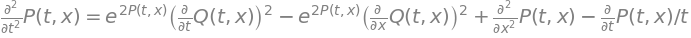

In [54]:
equation2 = Eq(diff(P,t,t), solve( ricciSimplified[2,2].args[2], diff(P,t,t) )[0] )
equation2

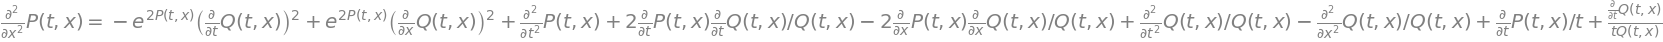

In [51]:
d2pdx2 = Eq(diff(P,x,x), expand( solve( ricciSimplified[2,3].args[2], diff(P,x,x) )[0] ) )
d2pdx2 

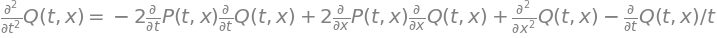

In [55]:
equation3 = Eq(diff(Q,t,t) , solve( ricciSimplified[3,3].args[2].subs(d2pdx2.lhs,d2pdx2.rhs), diff(Q,t,t) )[0] ) 
equation3

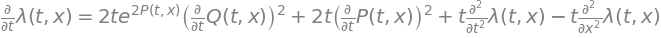

In [56]:
equation4 = Eq(diff(Lambda,t), expand( solve( ricciSimplified[0,0].args[2], diff(Lambda,t) )[0] ) ) 
equation4

In [36]:
equation5 = Eq(diff(Lambda,x), expand(solve( ricciSimplified[0,1].args[2], diff(Lambda,x) )[0] ) )
equation5